In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as plty
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error 
from scipy import signal
import plotly.graph_objects as go

In [5]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.8/112.8 KB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 62.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 22.5 MB/s eta 0:00:00
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting un

In [6]:
import yfinance as yf

In [7]:
# Define the ticker symbol
tickerSymbol = 'RELIANCE.NS'

In [8]:
# Get data on the ticker
tickerData = yf.Ticker(tickerSymbol)

In [9]:
# Get the historical prices for this ticker
data = tickerData.history(period='1d', start='2015-1-1', end='2023-1-31')

In [10]:
data=data.reset_index()

In [11]:
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2015-01-01 00:00:00+05:30,417.235681,419.919023,415.988161,417.988892,1367720,0.0,0.0
1,2015-01-02 00:00:00+05:30,418.083012,421.825572,416.294108,416.882568,3383424,0.0,0.0
2,2015-01-05 00:00:00+05:30,416.623722,419.401187,411.492415,412.316254,4662967,0.0,0.0
3,2015-01-06 00:00:00+05:30,409.562253,410.974552,391.673323,393.603455,8596809,0.0,0.0
4,2015-01-07 00:00:00+05:30,394.074252,404.289791,394.027177,402.171356,9562421,0.0,0.0


# Data Structure


#The date for every symbol is saved in CSV format with common fields:
​
Date - specifies trading date
Open - opening price
High - maximum price during the day
Low - minimum price during the day
Close - close price adjusted for splits
Adj Close - adjusted close price adjusted for both dividends and splits.
Volume - the number of shares that changed hands during a given day

In [14]:
data.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
1991,2023-01-23 00:00:00+05:30,2449.000000,2466.199951,2425.000000,2430.300049,5055324,0.0,0.0
1992,2023-01-24 00:00:00+05:30,2440.000000,2443.649902,2387.350098,2415.949951,7609558,0.0,0.0
1993,2023-01-25 00:00:00+05:30,2412.449951,2414.699951,2380.000000,2382.550049,5715684,0.0,0.0
1994,2023-01-27 00:00:00+05:30,2384.399902,2387.350098,2311.649902,2337.350098,11920991,0.0,0.0
1995,2023-01-30 00:00:00+05:30,2331.699951,2371.899902,2301.000000,2359.750000,10047822,0.0,0.0


In [15]:
data1=data[['Date','Close']]

In [16]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1996 entries, 0 to 1995
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype                       
---  ------  --------------  -----                       
 0   Date    1996 non-null   datetime64[ns, Asia/Kolkata]
 1   Close   1996 non-null   float64                     
dtypes: datetime64[ns, Asia/Kolkata](1), float64(1)
memory usage: 31.3 KB


In [17]:
data1

,Date,Close
0,2015-01-01 00:00:00+05:30,417.988892
1,2015-01-02 00:00:00+05:30,416.882568
2,2015-01-05 00:00:00+05:30,412.316254
3,2015-01-06 00:00:00+05:30,393.603455
4,2015-01-07 00:00:00+05:30,402.171356
...,...,...
1991,2023-01-23 00:00:00+05:30,2430.300049
1992,2023-01-24 00:00:00+05:30,2415.949951
1993,2023-01-25 00:00:00+05:30,2382.550049
1994,2023-01-27 00:00:00+05:30,2337.350098


In [18]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1996 entries, 0 to 1995
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype                       
---  ------  --------------  -----                       
 0   Date    1996 non-null   datetime64[ns, Asia/Kolkata]
 1   Close   1996 non-null   float64                     
dtypes: datetime64[ns, Asia/Kolkata](1), float64(1)
memory usage: 31.3 KB


In [19]:
data1.head()

,Date,Close
0,2015-01-01 00:00:00+05:30,417.988892
1,2015-01-02 00:00:00+05:30,416.882568
2,2015-01-05 00:00:00+05:30,412.316254
3,2015-01-06 00:00:00+05:30,393.603455
4,2015-01-07 00:00:00+05:30,402.171356


In [20]:
data1.shape

(1996, 2)

In [21]:
data1.isna().sum()

Date     0
Close    0
dtype: int64

In [22]:
data1.describe()

,Close
count,1996.000000
mean,1312.248359
std,761.112846
min,381.669647
25%,517.522003
50%,1170.243896
75%,2049.027588
max,2811.385742


In [23]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1996 entries, 0 to 1995
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype                       
---  ------  --------------  -----                       
 0   Date    1996 non-null   datetime64[ns, Asia/Kolkata]
 1   Close   1996 non-null   float64                     
dtypes: datetime64[ns, Asia/Kolkata](1), float64(1)
memory usage: 31.3 KB


In [24]:
data1.isna().sum()

Date     0
Close    0
dtype: int64

In [25]:
data1.shape

(1996, 2)

In [26]:
data2=data1.copy()

In [27]:
data2

,Date,Close
0,2015-01-01 00:00:00+05:30,417.988892
1,2015-01-02 00:00:00+05:30,416.882568
2,2015-01-05 00:00:00+05:30,412.316254
3,2015-01-06 00:00:00+05:30,393.603455
4,2015-01-07 00:00:00+05:30,402.171356
...,...,...
1991,2023-01-23 00:00:00+05:30,2430.300049
1992,2023-01-24 00:00:00+05:30,2415.949951
1993,2023-01-25 00:00:00+05:30,2382.550049
1994,2023-01-27 00:00:00+05:30,2337.350098


# Exploratory Data Analysis

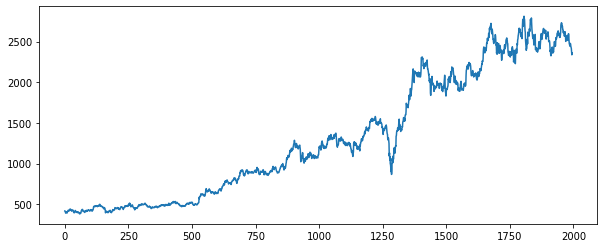

In [28]:
plt.figure(figsize=(10,4))
plt.plot(data['Close'])

In [29]:
# data.plot(figsize=(20,4))

# Box plot

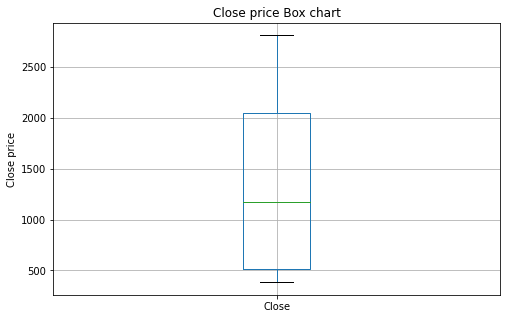

In [30]:
data.boxplot(column=['Close'],figsize=(8,5))
plt.ylabel("Close price")
plt.title("Close price Box chart")
plt.show()

# Volatility

<AxesSubplot:>

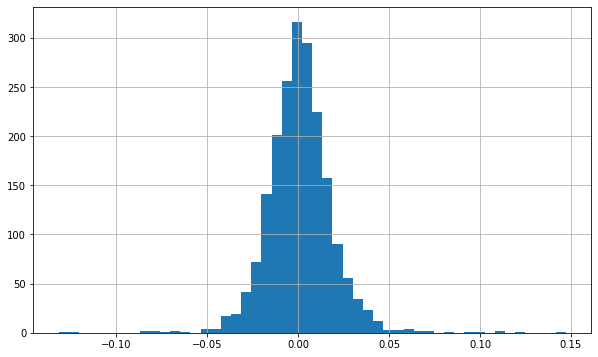

In [31]:
data['returns'] = (data['Close']/data['Close'].shift(1))-1
data['returns'].hist(bins=50,figsize=(10,6))

# Moving Average:

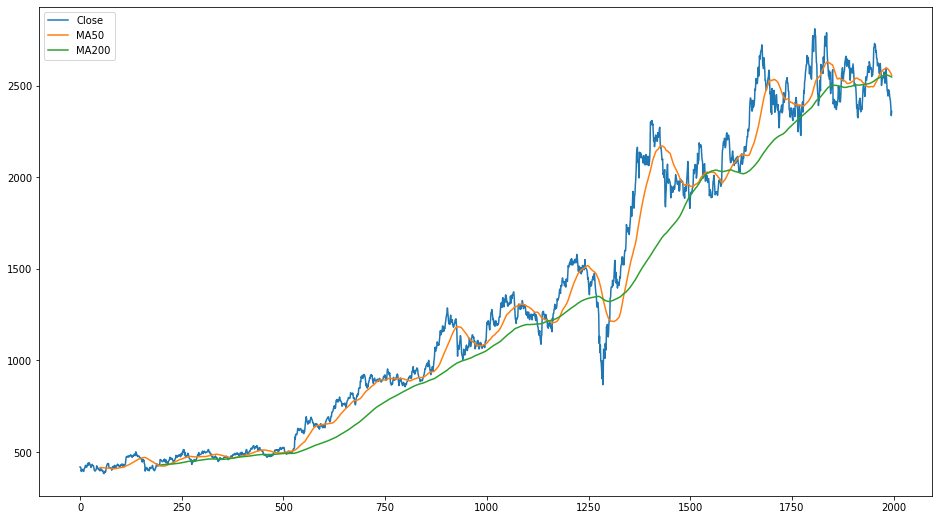

In [33]:
data['MA50']= data['Close'].rolling(50).mean()
data['MA200']= data['Close'].rolling(200).mean()

data[['Close','MA50','MA200']].plot(label="Dal",figsize=(16,9));

In [35]:
 # Slipting data set into test and train 

In [36]:
size=len(data2)-30
size

1966

In [37]:
data2

,Date,Close
0,2015-01-01 00:00:00+05:30,417.988892
1,2015-01-02 00:00:00+05:30,416.882568
2,2015-01-05 00:00:00+05:30,412.316254
3,2015-01-06 00:00:00+05:30,393.603455
4,2015-01-07 00:00:00+05:30,402.171356
...,...,...
1991,2023-01-23 00:00:00+05:30,2430.300049
1992,2023-01-24 00:00:00+05:30,2415.949951
1993,2023-01-25 00:00:00+05:30,2382.550049
1994,2023-01-27 00:00:00+05:30,2337.350098


In [38]:
train=data2[:size]
test=data2[size:]

In [39]:
len(test)

30

In [40]:
len(train)

1966

In [41]:
test

,Date,Close
1966,2022-12-19 00:00:00+05:30,2599.300049
1967,2022-12-20 00:00:00+05:30,2621.800049
1968,2022-12-21 00:00:00+05:30,2584.500000
1969,2022-12-22 00:00:00+05:30,2577.800049
1970,2022-12-23 00:00:00+05:30,2502.199951
1971,2022-12-26 00:00:00+05:30,2524.050049
1972,2022-12-27 00:00:00+05:30,2544.699951
1973,2022-12-28 00:00:00+05:30,2544.449951
1974,2022-12-29 00:00:00+05:30,2543.300049
1975,2022-12-30 00:00:00+05:30,2547.199951


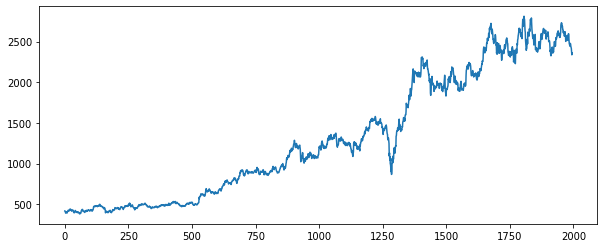

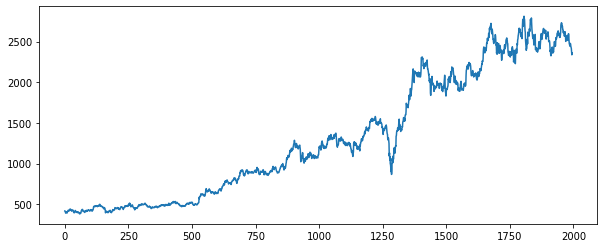

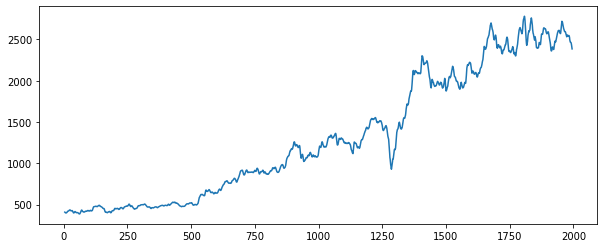

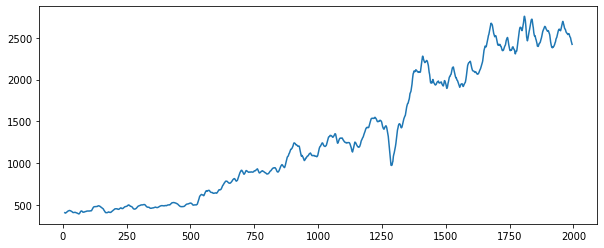

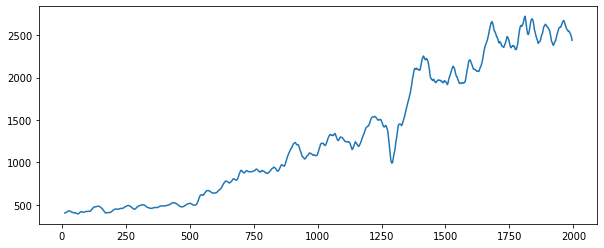

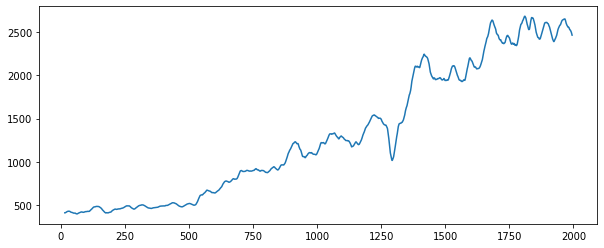

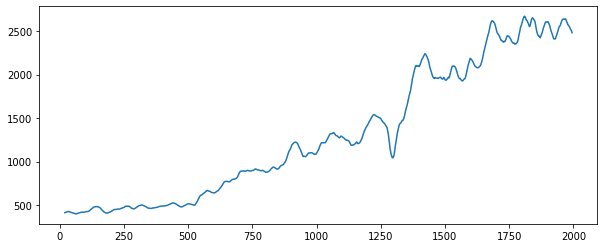

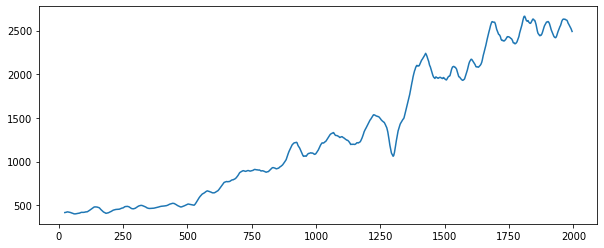

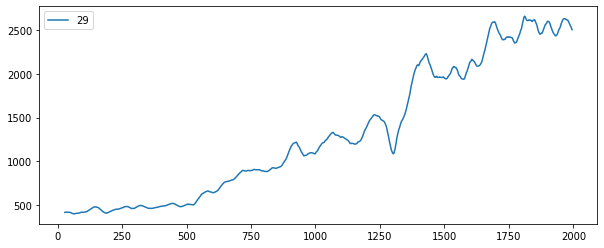

In [42]:
plt.figure(figsize=(10,4))
data2['Close'].plot(label='org')
for i in range(1,30,4): # 1 to 50 with 4 skip
    plt.figure(figsize=(10,4))
    data2['Close'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose

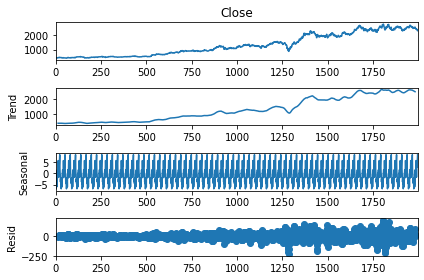

In [44]:
seasonal_decompose(data2['Close'],period=29).plot();

In [45]:
data2['dif']=data2['Close'].diff(periods=29)

In [46]:
from statsmodels.tsa.stattools import adfuller

In [47]:
adfuller(data2['dif'].dropna())

(-9.08607680774965,
 3.9370901336088274e-15,
 26,
 1940,
 {'1%': -3.4337252441664483,
  '5%': -2.8630309758314314,
  '10%': -2.56756373605059},
 19633.711433870187)

In [48]:
data2

,Date,Close,dif
0,2015-01-01 00:00:00+05:30,417.988892,NaN
1,2015-01-02 00:00:00+05:30,416.882568,NaN
2,2015-01-05 00:00:00+05:30,412.316254,NaN
3,2015-01-06 00:00:00+05:30,393.603455,NaN
4,2015-01-07 00:00:00+05:30,402.171356,NaN
...,...,...,...
1991,2023-01-23 00:00:00+05:30,2430.300049,-194.699951
1992,2023-01-24 00:00:00+05:30,2415.949951,-199.550049
1993,2023-01-25 00:00:00+05:30,2382.550049,-195.800049
1994,2023-01-27 00:00:00+05:30,2337.350098,-228.250000


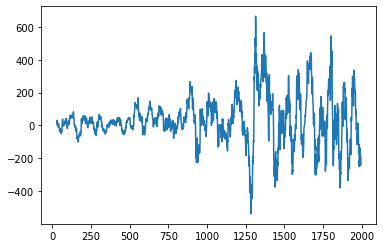

In [49]:
plt.plot(data2['dif'])

In [50]:
# it is not statinory 

# Building Model

### we are using smoothing methods

In [51]:
def mape(pred,org):
    x=np.abs((pred-org)/org)*100
    return np.mean(x)

In [52]:
train

,Date,Close
0,2015-01-01 00:00:00+05:30,417.988892
1,2015-01-02 00:00:00+05:30,416.882568
2,2015-01-05 00:00:00+05:30,412.316254
3,2015-01-06 00:00:00+05:30,393.603455
4,2015-01-07 00:00:00+05:30,402.171356
...,...,...
1961,2022-12-12 00:00:00+05:30,2613.100098
1962,2022-12-13 00:00:00+05:30,2625.000000
1963,2022-12-14 00:00:00+05:30,2615.500000
1964,2022-12-15 00:00:00+05:30,2578.350098


In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1966 entries, 0 to 1965
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype                       
---  ------  --------------  -----                       
 0   Date    1966 non-null   datetime64[ns, Asia/Kolkata]
 1   Close   1966 non-null   float64                     
dtypes: datetime64[ns, Asia/Kolkata](1), float64(1)
memory usage: 30.8 KB


In [54]:
test.isna().sum()

Date     0
Close    0
dtype: int64

In [55]:
train

,Date,Close
0,2015-01-01 00:00:00+05:30,417.988892
1,2015-01-02 00:00:00+05:30,416.882568
2,2015-01-05 00:00:00+05:30,412.316254
3,2015-01-06 00:00:00+05:30,393.603455
4,2015-01-07 00:00:00+05:30,402.171356
...,...,...
1961,2022-12-12 00:00:00+05:30,2613.100098
1962,2022-12-13 00:00:00+05:30,2625.000000
1963,2022-12-14 00:00:00+05:30,2615.500000
1964,2022-12-15 00:00:00+05:30,2578.350098


### SimpleExpo

In [56]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing,Holt,ExponentialSmoothing

In [57]:
simp=SimpleExpSmoothing(train['Close']).fit(smoothing_level=0.9)
simp_pred=simp.forecast(len(test))
mape(simp_pred,test['Close'])

2.9598044766041918

In [58]:
simp_pred

1966    2567.254907
1967    2567.254907
1968    2567.254907
1969    2567.254907
1970    2567.254907
1971    2567.254907
1972    2567.254907
1973    2567.254907
1974    2567.254907
1975    2567.254907
1976    2567.254907
1977    2567.254907
1978    2567.254907
1979    2567.254907
1980    2567.254907
1981    2567.254907
1982    2567.254907
1983    2567.254907
1984    2567.254907
1985    2567.254907
1986    2567.254907
1987    2567.254907
1988    2567.254907
1989    2567.254907
1990    2567.254907
1991    2567.254907
1992    2567.254907
1993    2567.254907
1994    2567.254907
1995    2567.254907
dtype: float64

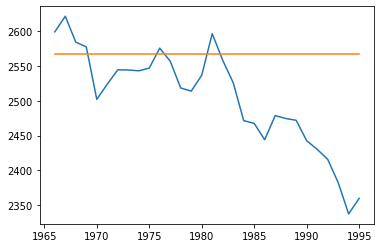

In [59]:
# plt.plot(train['Close'])
plt.plot(test['Close'])
plt.plot(simp_pred)

In [60]:
### Holts

### Holts

In [61]:
holts=Holt(train['Close']).fit(smoothing_level=0.4,smoothing_trend=0.1)
holts_pred=holts.forecast(len(test))
mape(holts_pred,test['Close'])

1.1706010297846774

In [62]:
mape(holts_pred,test['Close'])

1.1706010297846774

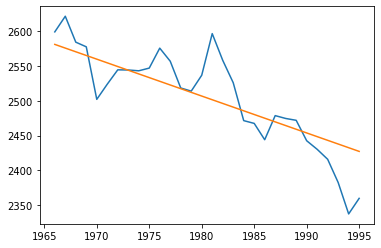

In [63]:
# plt.plot(train['Close'])
plt.plot(test['Close'])
plt.plot(holts_pred)

In [64]:
holts_pred

1966    2581.287972
1967    2575.978809
1968    2570.669647
1969    2565.360484
1970    2560.051322
1971    2554.742159
1972    2549.432996
1973    2544.123834
1974    2538.814671
1975    2533.505509
1976    2528.196346
1977    2522.887184
1978    2517.578021
1979    2512.268859
1980    2506.959696
1981    2501.650534
1982    2496.341371
1983    2491.032209
1984    2485.723046
1985    2480.413884
1986    2475.104721
1987    2469.795559
1988    2464.486396
1989    2459.177234
1990    2453.868071
1991    2448.558909
1992    2443.249746
1993    2437.940584
1994    2432.631421
1995    2427.322259
dtype: float64

In [65]:
test

,Date,Close
1966,2022-12-19 00:00:00+05:30,2599.300049
1967,2022-12-20 00:00:00+05:30,2621.800049
1968,2022-12-21 00:00:00+05:30,2584.500000
1969,2022-12-22 00:00:00+05:30,2577.800049
1970,2022-12-23 00:00:00+05:30,2502.199951
1971,2022-12-26 00:00:00+05:30,2524.050049
1972,2022-12-27 00:00:00+05:30,2544.699951
1973,2022-12-28 00:00:00+05:30,2544.449951
1974,2022-12-29 00:00:00+05:30,2543.300049
1975,2022-12-30 00:00:00+05:30,2547.199951


In [66]:
len(test)

30

### HoltsWinter

In [67]:
len(test)

30

In [68]:
mape1=[]
period=[]

In [69]:
for i in range(1,200):
    x=i+1
    expo=ExponentialSmoothing(train['Close'],trend='add',seasonal='mul',seasonal_periods=x).fit() #add,mul
    expo_pred=expo.forecast(steps=len(test))
    error=mape(expo_pred,test['Close'])
    mape1.append(error)
    period.append(x)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/mod

In [70]:
mape1

[3.471462773299223,
 2.518539661661381,
 3.5260572517386644,
 3.2406099354750917,
 3.568919738536598,
 3.496515010159673,
 3.5972947639824726,
 3.6833511729500352,
 3.194832398368132,
 3.4175437476521457,
 3.4174835975144413,
 3.4315453182293814,
 3.878763867426654,
 3.7887515454558502,
 3.4163260479312942,
 3.726540339016984,
 3.5828444474458134,
 4.4670559179672855,
 3.4074649154877035,
 3.7555627433427587,
 3.5897187535078845,
 3.3725264746184807,
 3.8144187336779702,
 3.671460496300125,
 3.205368066916147,
 3.3901088817892013,
 3.812853332566341,
 3.212059788604579,
 3.9424571704398734,
 3.967725680686987,
 2.9542639930297327,
 2.6141013285916186,
 2.9067691612533237,
 3.3058099359025546,
 3.6025974722990664,
 3.546758909496226,
 4.506507940261446,
 3.614163665447848,
 3.397771984125164,
 2.90777249717261,
 3.1818684713557497,
 3.2893357781801993,
 2.584095181664999,
 2.821048478354917,
 3.274096691199126,
 3.74814552077781,
 4.187684353651723,
 4.5464952656523225,
 4.1649160433271

In [71]:
periods=pd.DataFrame(period,columns=['period'])

In [72]:
periods['mape']=mape1

In [73]:
periods.sort_values(by='mape').head(1)

,period,mape
139,141,1.28806


In [74]:
expo=ExponentialSmoothing(train['Close'],trend='add',seasonal='mul',seasonal_periods=141).fit()
# expo_pred=expo.forecast
expo_pred=expo.forecast(30)
mape(expo_pred,test['Close'])

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



1.2880604252189471

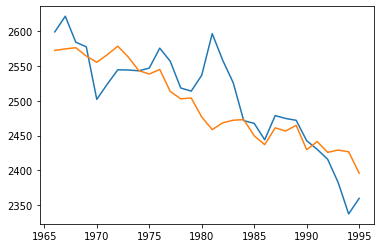

In [75]:
# plt.plot(train['Close'])
plt.plot(test['Close'])
plt.plot(expo_pred)

In [76]:
expo_pred.tail(10)

1986    2437.017562
1987    2461.192155
1988    2456.625115
1989    2464.803712
1990    2429.773806
1991    2441.458918
1992    2425.915051
1993    2429.254897
1994    2426.802414
1995    2395.938039
dtype: float64

In [77]:
test.tail(10)

,Date,Close
1986,2023-01-16 00:00:00+05:30,2444.100098
1987,2023-01-17 00:00:00+05:30,2478.800049
1988,2023-01-18 00:00:00+05:30,2474.699951
1989,2023-01-19 00:00:00+05:30,2472.050049
1990,2023-01-20 00:00:00+05:30,2442.649902
1991,2023-01-23 00:00:00+05:30,2430.300049
1992,2023-01-24 00:00:00+05:30,2415.949951
1993,2023-01-25 00:00:00+05:30,2382.550049
1994,2023-01-27 00:00:00+05:30,2337.350098
1995,2023-01-30 00:00:00+05:30,2359.750000


In [78]:
train.shape,test.shape

((1966, 2), (30, 2))

In [79]:
expo1=ExponentialSmoothing(data2['Close'],trend='add',seasonal='mul',seasonal_periods=144).fit()
expo_pred_30=expo1.forecast(30)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



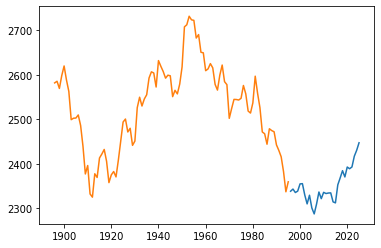

In [81]:
plt.plot(expo_pred_30)
plt.plot(data2['Close'].tail(100))
plt.show()

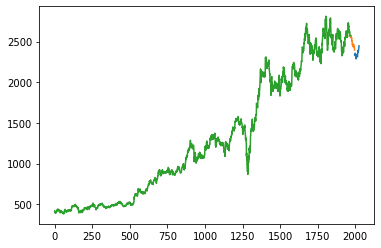

In [82]:
plt.plot(expo_pred_30)
plt.plot(expo_pred)
plt.plot(train['Close'])

In [83]:
final=data2['Close'].append(expo_pred_30)

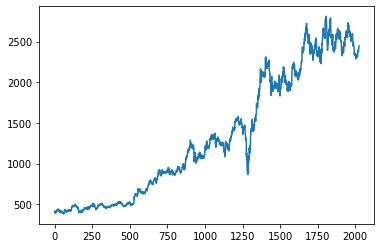

In [84]:
plt.plot(final)

In [85]:
tickersymb='RELIANCE.NS'

In [86]:
ticker_data= yf.Ticker(tickersymb)

In [87]:
feb=ticker_data.history(period='1D',start='2015-01-01',end='2023-02-22')

In [88]:
feb

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-01-01 00:00:00+05:30,417.235711,419.919054,415.988191,417.988922,1367720,0.0,0.0
2015-01-02 00:00:00+05:30,418.083012,421.825572,416.294108,416.882568,3383424,0.0,0.0
2015-01-05 00:00:00+05:30,416.623691,419.401156,411.492384,412.316223,4662967,0.0,0.0
2015-01-06 00:00:00+05:30,409.562285,410.974584,391.673353,393.603485,8596809,0.0,0.0
2015-01-07 00:00:00+05:30,394.074222,404.289760,394.027147,402.171326,9562421,0.0,0.0
...,...,...,...,...,...,...,...
2023-02-15 00:00:00+05:30,2376.000000,2437.199951,2373.000000,2431.949951,15461902,0.0,0.0
2023-02-16 00:00:00+05:30,2449.449951,2463.800049,2425.050049,2430.050049,7967558,0.0,0.0
2023-02-17 00:00:00+05:30,2420.000000,2447.500000,2410.600098,2440.199951,5450092,0.0,0.0


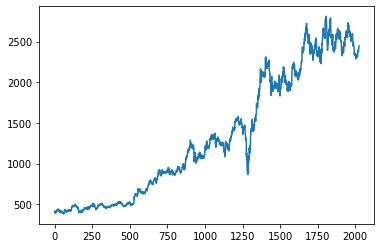

In [89]:
plt.plot(final)

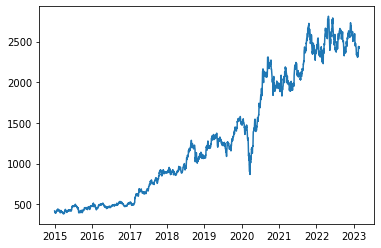

In [90]:
plt.plot(feb['Close'])

In [91]:
np.sqrt(mean_squared_error(feb['Close'].tail(16),expo_pred_30[:16]))

66.11668619228632

In [92]:
import joblib as jb

In [93]:
jb.dump(expo1,'Forcast_Model.pkl')

['Forcast_Model.pkl']